In [1]:
import joblib
import numpy
from scipy import stats
import pandas as pd
from sklearn.pipeline import Pipeline

model: Pipeline = joblib.load("../models/polynomial_regression.pkl")
test_set = pd.read_csv("../data/test_set_cleaned.csv")
confidence = 0.95

test_set.head()

,Unnamed: 0,cylinders,model_year,weight,acceleration,USA,Europe,Asia,mpg
0,0,-0.869993,-0.025452,-0.853236,0.745183,1.0,0.0,0.0,26.0
1,1,1.486898,0.787179,0.523734,2.361636,1.0,0.0,0.0,23.9
2,2,1.486898,-0.025452,1.433835,-0.943111,1.0,0.0,0.0,16.0
3,3,-1.459216,1.058056,-0.658215,-1.122717,0.0,0.0,1.0,23.7
4,4,0.308452,1.328933,0.576922,0.350051,1.0,0.0,0.0,17.6


In [2]:
y_preds = model.predict(test_set.drop(["Unnamed: 0", "mpg"], axis=1))
y_true = test_set["mpg"]

In [3]:
from scipy import stats
import numpy as np

confidence = 0.95
squared_errors = (y_preds - y_true) ** 2
ci = np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors),
    )
)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(ci[0], ci[1]))

95% Confidence Interval: [2.162, 3.369]


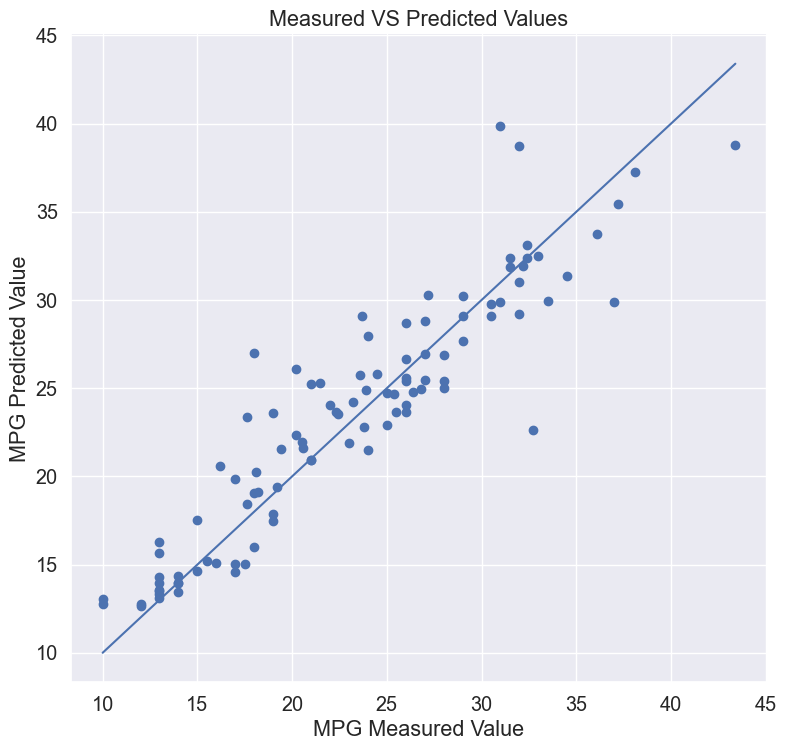

In [4]:
# Imports for vizualisation
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.3)
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

figsize(8, 8)
fig, ax = plt.subplots()
min_ = y_true.min()
max_ = y_true.max()
ax.scatter(y_true, y_preds)
ax.plot([min_, max_], [min_, max_])
plt.xlabel("MPG Measured Value")
plt.ylabel("MPG Predicted Value")
plt.title("Measured VS Predicted Values")

sns.despine()

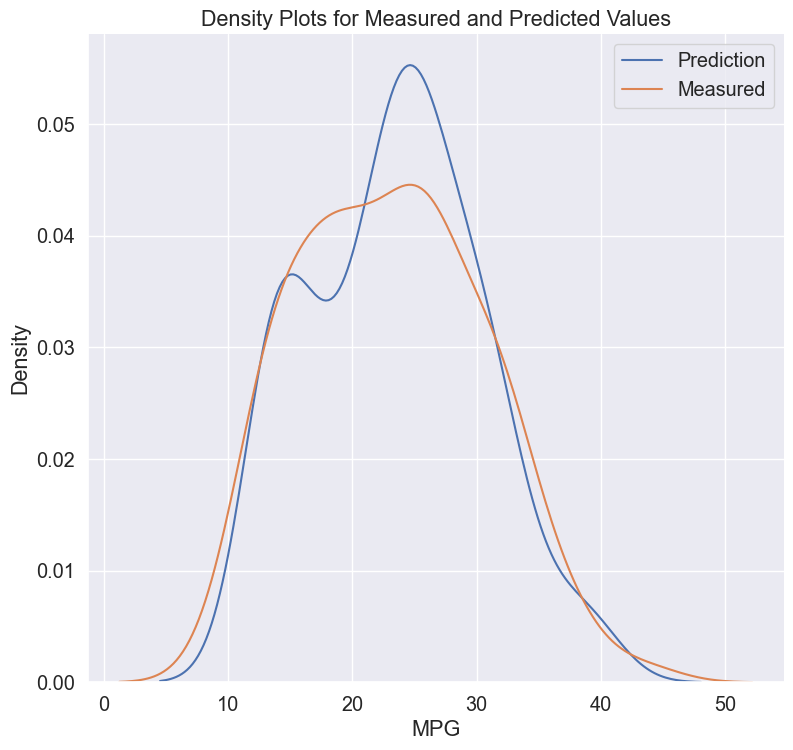

In [6]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(y_preds, label="Prediction")
sns.kdeplot(y_true, label="Measured")

# Label the plot
plt.xlabel("MPG")
plt.ylabel("Density")
plt.title("Density Plots for Measured and Predicted Values")
plt.legend()
sns.despine()